In [1]:
import pandas as pd 
import numpy  as np
import os 
from defname import *
import time
pd.set_option('display.max_columns',None)

In [2]:
route = r"C:/Users/Administrator/Datas/4门店模型/张家口门店/张家口月门店.csv"
# null_data = pd.DataFrame()
# for i in range(1,9):
#     url = route + str(i) + '月/大连整月数据.csv'
#     data = pd.read_csv(url,encoding='utf8')
#     data['时间'] = i
#     null_data= pd.concat([null_data,data],axis=0)
# df = null_data

In [3]:
df = pd.read_csv(route,encoding='utf8')

In [4]:
# df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])
# df.to_csv('张家口门店.csv')

In [5]:
df = df.fillna(0)

In [6]:
# data = df[df['品牌ID'] == 0]

data = df
data['客单价'] = data['实付交易额'] / data['订单数']

In [7]:
def roin(data,object_):
    pinpai_ID = data.drop_duplicates(subset=object_,inplace=False)
    pinpai_list_ID = list(pinpai_ID[object_])
    pinpai_dict_list = []
    
    
    for nameid in pinpai_list_ID:
        for_dict = {}

        df_for_x = data[data[object_] == nameid ]
        
        dingdan_std =  df_for_x['订单数'].std()
    #     订单总数
        dingdan_sum =  df_for_x['订单数'].sum()
        
        dingdan_baoguangrenshu  =  df_for_x['曝光人数'].sum()
    #     金额总数
        jin_sum =  df_for_x['实付交易额'].sum()
    #     平均订单数
        dingdan_mean = dingdan_sum/df_for_x['poi_id'].count()
    #     平均金额
        jin_mean = jin_sum/df_for_x['poi_id'].count()
    #     均客单价
        kedanjia_mean = df_for_x['客单价'].mean()
    #     最小客单价
        kedanjia_min = df_for_x['客单价'].min()
    #     最大客单价
        kedanjia_max = df_for_x['客单价'].max()
    #     非议订单
        feiyi =  df_for_x['非异订单数'].sum()
    #     拒单
        judan  =  df_for_x['商家拒单订单数'].sum()
    #     bujied不接单
        bujiedan =  df_for_x['商家不接单订单数'].sum()
    #     投诉D单
        tousu =  df_for_x['商家违规投诉订单数'].sum()
        


        pinpai_dict_list__count = df_for_x.drop_duplicates(subset = '蜂窝')['蜂窝'].count()
        for_dict[object_] = nameid
        for_dict['门店总数'] = df_for_x['poi_id'].count()
        for_dict['订单数'] = dingdan_sum
        for_dict['曝光人数'] = dingdan_baoguangrenshu
        for_dict['订单方差'] = dingdan_std
        for_dict['实付交易额'] = jin_sum
        for_dict['平均订单数'] = dingdan_mean
        for_dict['平均金额'] = jin_mean
        for_dict['均客单价'] = kedanjia_mean
        for_dict['最小客单价'] = kedanjia_min
        for_dict['最大客单价'] = kedanjia_max
        for_dict['非议订单数'] = feiyi
        for_dict['拒单'] = judan
        for_dict['不接订单'] = bujiedan
        for_dict['蜂窝数量']  = pinpai_dict_list__count
        pinpai_dict_list.append(for_dict) 
    for i in range(len(pinpai_dict_list)):

        dataframe_i = pd.DataFrame([pinpai_dict_list[i]])
        dataframe_i = dataframe_i.fillna(0)
        if i == 0:
            pinpai_dict_dataframe1 = dataframe_i
        else:
            pinpai_dict_dataframe1 = pd.concat([pinpai_dict_dataframe1,dataframe_i],axis=0)
    
    pinpai_dict_dataframe1 = pinpai_dict_dataframe1.sort_values(by='订单数',ascending=False)
    
    return pinpai_dict_dataframe1

In [23]:
data_fengwo= roin(data,'蜂窝')
data_fengwo

,蜂窝,门店总数,订单数,曝光人数,订单方差,实付交易额,平均订单数,平均金额,均客单价,最小客单价,最大客单价,非议订单数,拒单,不接订单,蜂窝数量
0,0,80,377,148104,8.206502,48974.55,4.712500,612.181875,146.888235,42.616667,599.000000,16,7,2,1
0,宣化区,30,311,132547,22.644910,38087.51,10.366667,1269.583667,116.481875,59.283333,237.200000,9,1,0,1
0,桥东区,20,306,100746,42.937041,39068.66,15.300000,1953.433000,160.716016,50.250000,398.880000,23,9,0,1
0,桥西区,24,292,102935,37.598181,32329.54,12.166667,1347.064167,137.643002,82.793333,299.000000,26,5,2,1
0,高新区,26,240,141187,20.711944,24995.03,9.230769,961.347308,99.874935,8.833333,168.000000,8,3,1,1
0,河北北方学院,4,144,34488,61.193682,16365.90,36.000000,4091.475000,116.067462,112.905512,119.229412,5,2,0,1
0,银座,26,41,65429,3.869605,5137.99,1.576923,197.615000,149.307950,94.666667,218.000000,3,1,0,1


In [25]:
data_store= roin(data,'品牌名')

In [10]:
data_fengwo['订单数'].sum()

1711

In [31]:
print(data['poi_id'].count())
print(data['订单数'].sum())
print(data_store['品牌名'].count())
print(data['实付交易额'].sum())

210
1711
33
204959.18000000002


In [32]:
data_p = data[data['品牌ID'] > 0]
data_s = data[data['品牌ID'] <= 0]

In [33]:
print(data_p['poi_id'].count())
print(data_p['订单数'].sum())
print(data_p['实付交易额'].sum())

105
701
82707.42


In [34]:
print(data_s['poi_id'].count())
print(data_s['订单数'].sum())
print(data_s['实付交易额'].sum())

105
1010
122251.76000000001


In [71]:
data_s_hight.sort_values(by = '订单数',ascending=False)

,Unnamed: 0,poi_id,门店名,品牌ID,品牌名,省份,城市,城市等级,蜂窝,首次上线时间,一级品类,二级品类,在线商品数,提单数,推单数,订单数,原价交易额,实付交易额,非异订单数,商家配送延迟订单数,商家拒单订单数,商家不接单订单数,商家取消不告知订单数,商家违规投诉订单数,美团配送延迟订单数,因美团配送原因取消订单数,曝光人数,进店人数,成单用户数,客单价
33,0,7380463,花驿花苑(礼品鲜花，生日花、表白花),0,0,河北省,张家口,D1,桥东区,20190709.0,鲜花绿植,鲜花店,605,232,209,182,66106.00,24276.00,17,10,7,0,0,0,0,0,18087,1386,182,133.384615
115,0,6498010,此间花开,0,0,河北省,张家口,D1,桥西区,20190220.0,鲜花绿植,鲜花店,554,218,203,181,72576.00,20602.00,19,12,5,0,0,0,0,0,17996,1837,181,113.823204
184,0,7011821,一花一慕花坊（康乃馨•百合•向日葵•开业用花）,0,0,河北省,张家口,D1,河北北方学院,20190513.0,鲜花绿植,鲜花店,345,145,136,127,37242.00,14339.00,5,3,2,0,0,0,0,0,21213,1490,126,112.905512
9,0,9558174,樊樊鲜花店（鲜花生日花开业花篮）,0,0,河北省,张家口,D1,高新区,20200718.0,鲜花绿植,鲜花店,453,121,109,100,37811.90,11743.90,3,3,0,0,0,0,0,0,16851,1064,100,117.439000
167,0,881612,花花世界（鲜花店，绿植，生日花）,0,0,河北省,张家口,D1,宣化区,20160419.0,鲜花绿植,鲜花店,372,118,102,95,41782.00,11349.72,3,3,0,0,0,0,0,0,13638,951,95,119.470737
15,0,9270134,鹿与野花卉·生日花,0,0,河北省,张家口,D1,桥东区,20200714.0,鲜花绿植,综合鲜花绿植店,530,103,90,78,35059.00,9502.00,4,3,0,0,0,0,0,0,19322,748,78,121.820513
112,0,3801797,米兰鲜花店鲜花绿植,0,0,河北省,张家口,D1,宣化区,20171114.0,鲜花绿植,鲜花店,546,47,40,38,14316.00,5204.00,2,1,0,0,0,0,0,0,10920,428,38,136.947368
180,0,7417976,锦熹花艺（鲜花，绿植，生日花）,0,0,河北省,张家口,D1,桥西区,20190710.0,鲜花绿植,鲜花店,514,30,29,26,8918.00,2826.10,1,0,0,0,0,0,0,0,10754,387,26,108.696154
163,0,9915938,纯爱花坊（生日花、表白花、开业花篮）,0,0,河北省,张家口,D1,高新区,20200907.0,鲜花绿植,鲜花店,445,34,27,25,9158.00,3152.90,2,0,1,0,0,1,0,0,14092,247,25,126.116000
176,0,9652002,鲜花绿植（生日花）,0,0,河北省,张家口,D1,0,20200803.0,鲜花绿植,鲜花店,533,32,28,19,2162.00,2040.02,1,0,0,0,0,0,0,0,6439,274,19,107.369474


In [45]:
duplicates(data_s,'蜂窝')

[['河北北方学院', '宣化区', '桥东区', '银座', 0, '桥西区', '高新区'],
 {'河北北方学院': 4, '宣化区': 17, '桥东区': 9, '银座': 11, 0: 43, '桥西区': 6, '高新区': 15},
 {}]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 35746 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from curre

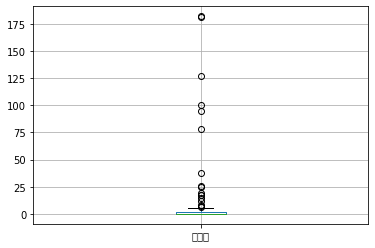

In [48]:
data_s.boxplot('订单数')

In [66]:
data_s['订单数'].quantile(0.94)

35.11999999999989

In [69]:
data_s_hight = data_s[data_s['订单数'] >=5 ]
duplicates(data_s_hight,'蜂窝')

[['桥东区', '宣化区', 0, '桥西区', '河北北方学院', '高新区'],
 {'桥东区': 2, '宣化区': 3, 0: 4, '桥西区': 2, '河北北方学院': 2, '高新区': 5},
 {'银座': 1}]

In [11]:
data[data['poi_id'] == 8404291]

,Unnamed: 0,poi_id,门店名,品牌ID,品牌名,省份,城市,城市等级,蜂窝,首次上线时间,一级品类,二级品类,在线商品数,提单数,推单数,订单数,原价交易额,实付交易额,非异订单数,商家配送延迟订单数,商家拒单订单数,商家不接单订单数,商家取消不告知订单数,商家违规投诉订单数,美团配送延迟订单数,因美团配送原因取消订单数,曝光人数,进店人数,成单用户数,客单价
111,0,8404291,艾妮花艺（百合·康乃馨·向日葵）,100034936,玫瑰说,河北省,张家口,D1,桥西区,20200121.0,鲜花绿植,鲜花店,398,57,54,48,10160.0,4573.6,5,4,0,1,0,0,0,0,7685,415,47,95.283333


In [12]:
data[data['poi_id'] == 5637999]

,Unnamed: 0,poi_id,门店名,品牌ID,品牌名,省份,城市,城市等级,蜂窝,首次上线时间,一级品类,二级品类,在线商品数,提单数,推单数,订单数,原价交易额,实付交易额,非异订单数,商家配送延迟订单数,商家拒单订单数,商家不接单订单数,商家取消不告知订单数,商家违规投诉订单数,美团配送延迟订单数,因美团配送原因取消订单数,曝光人数,进店人数,成单用户数,客单价
80,0,5637999,花小匠,100012195,爱花轩,河北省,张家口,D1,桥西区,20180815.0,鲜花绿植,鲜花店,415,15,15,15,2433.9,1241.9,0,0,0,0,0,0,0,0,2949,89,15,82.793333


In [13]:
data[data['poi_id'] == 3103363]

,Unnamed: 0,poi_id,门店名,品牌ID,品牌名,省份,城市,城市等级,蜂窝,首次上线时间,一级品类,二级品类,在线商品数,提单数,推单数,订单数,原价交易额,实付交易额,非异订单数,商家配送延迟订单数,商家拒单订单数,商家不接单订单数,商家取消不告知订单数,商家违规投诉订单数,美团配送延迟订单数,因美团配送原因取消订单数,曝光人数,进店人数,成单用户数,客单价
7,0,3103363,北方学院鲜花,100012195,爱花轩,河北省,张家口,D1,高新区,20170823.0,鲜花绿植,鲜花店,415,49,45,41,6236.0,3147.2,1,0,0,1,0,0,0,0,4836,212,41,76.760976


In [74]:
data_fengwo.to_csv('data_fengwo.csv')

In [16]:
data[data['门店名'] == '樊樊鲜花店（鲜花生日花开业花篮）']

,Unnamed: 0,poi_id,门店名,品牌ID,品牌名,省份,城市,城市等级,蜂窝,首次上线时间,一级品类,二级品类,在线商品数,提单数,推单数,订单数,原价交易额,实付交易额,非异订单数,商家配送延迟订单数,商家拒单订单数,商家不接单订单数,商家取消不告知订单数,商家违规投诉订单数,美团配送延迟订单数,因美团配送原因取消订单数,曝光人数,进店人数,成单用户数,客单价
9,0,9558174,樊樊鲜花店（鲜花生日花开业花篮）,0,0,河北省,张家口,D1,高新区,20200718.0,鲜花绿植,鲜花店,453,121,109,100,37811.9,11743.9,3,3,0,0,0,0,0,0,16851,1064,100,117.439


In [17]:
data[data['门店名'] == '纯爱花坊（生日花、表白花、开业花篮）']

,Unnamed: 0,poi_id,门店名,品牌ID,品牌名,省份,城市,城市等级,蜂窝,首次上线时间,一级品类,二级品类,在线商品数,提单数,推单数,订单数,原价交易额,实付交易额,非异订单数,商家配送延迟订单数,商家拒单订单数,商家不接单订单数,商家取消不告知订单数,商家违规投诉订单数,美团配送延迟订单数,因美团配送原因取消订单数,曝光人数,进店人数,成单用户数,客单价
163,0,9915938,纯爱花坊（生日花、表白花、开业花篮）,0,0,河北省,张家口,D1,高新区,20200907.0,鲜花绿植,鲜花店,445,34,27,25,9158.0,3152.9,2,0,1,0,0,1,0,0,14092,247,25,126.116


In [18]:
data[data['门店名'] == '此间花开']

,Unnamed: 0,poi_id,门店名,品牌ID,品牌名,省份,城市,城市等级,蜂窝,首次上线时间,一级品类,二级品类,在线商品数,提单数,推单数,订单数,原价交易额,实付交易额,非异订单数,商家配送延迟订单数,商家拒单订单数,商家不接单订单数,商家取消不告知订单数,商家违规投诉订单数,美团配送延迟订单数,因美团配送原因取消订单数,曝光人数,进店人数,成单用户数,客单价
115,0,6498010,此间花开,0,0,河北省,张家口,D1,桥西区,20190220.0,鲜花绿植,鲜花店,554,218,203,181,72576.0,20602.0,19,12,5,0,0,0,0,0,17996,1837,181,113.823204
